In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
from decimal import Decimal
#https://github.com/imdevskp/covid_19_jhu_data_web_scrap_and_cleaning

In [4]:
conf_df = pd.read_csv('jhuData/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('jhuData/time_series_covid19_deaths_global.csv')
recv_df = pd.read_csv('jhuData/time_series_covid19_recovered_global.csv')

In [5]:
dates = conf_df.columns[4:]

conf_df_long = conf_df.melt(id_vars=['Province/State', 'Country/Region'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

deaths_df_long = deaths_df.melt(id_vars=['Province/State', 'Country/Region'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')

recv_df_long = recv_df.melt(id_vars=['Province/State', 'Country/Region'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')

recv_df_long = recv_df_long[recv_df_long['Country/Region']!='Canada']

In [6]:
full_table = pd.merge(left=conf_df_long, right=deaths_df_long, how='left',
                      on=['Province/State', 'Country/Region', 'Date'])
full_table = pd.merge(left=full_table, right=recv_df_long, how='left',
                      on=['Province/State', 'Country/Region', 'Date'])

In [7]:
full_table = full_table.rename(columns={'Province/State': 'Province', 'Country/Region': 'Country'})

In [8]:
del full_table['Province']

In [9]:
countries = ['France','Germany','Spain','Italy']

In [10]:
full_table = full_table.query('Country in @countries')

In [11]:
full_table = full_table.fillna(0)

In [12]:
full_table.to_csv('test.csv')

In [13]:
test = []

In [14]:
tmp = []
n = 'France'
c = 0 #3
d = 0 #4
r = 0 #5

with open('test.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        if (row[1]=='Country'):
            continue
        try:
            if(row[1] == n):
                c = c + int(row[3])
                d = d + int(row[4])
                
                
                i = row[5].find('.')
                x = int(row[5][:i])
                
                r = r + x
            else:
                tmp.append(row[0])
                tmp.append(n)
                tmp.append(row[2])
                tmp.append(c)
                tmp.append(d)
                tmp.append(r)
                c = 0
                d = 0
                r = 0
                test.append(tmp)
                tmp = []
                n = row[1]
                c = c + int(row[3])
                d = d + int(row[4])
                
                
                
                i = row[5].find('.')
                x = int(row[5][:i])
                
                
                r = r + x
        except:
            continue

In [15]:
df = pd.DataFrame(test)
df.columns = ['index','Country', 'Date', 'Confirmed', 'Death','Recovered']

In [16]:
del df['index']

In [17]:
df = df.sort_values(by=['Country','Date'])

In [18]:
df.to_csv('test2.csv')

In [19]:
finalDf = pd.read_csv('jhuData/finalData.csv')

In [20]:
F = finalDf.loc[finalDf['Country'] == 'France']
G = finalDf.loc[finalDf['Country'] == 'Germany']
I = finalDf.loc[finalDf['Country'] == 'Italy']
S = finalDf.loc[finalDf['Country'] == 'Spain']

In [21]:
del F['Country']
del F['Date']
del F['Unnamed: 0']
del G['Country']
del G['Date']
del G['Unnamed: 0']
del I['Country']
del I['Date']
del I['Unnamed: 0']
del S['Country']
del S['Date']
del S['Unnamed: 0']

In [22]:
F = F.set_index(pd.date_range('1/22/2020', periods=97))
G = G.set_index(pd.date_range('1/22/2020', periods=97))
I = I.set_index(pd.date_range('1/22/2020', periods=97))
S = S.set_index(pd.date_range('1/22/2020', periods=97))

<Figure size 432x288 with 0 Axes>

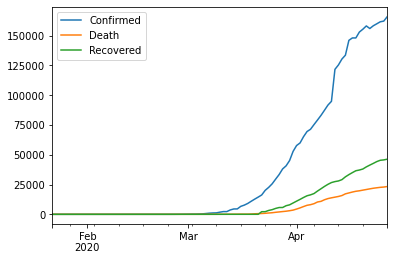

In [25]:
plt.figure()
F.plot();

<Figure size 432x288 with 0 Axes>

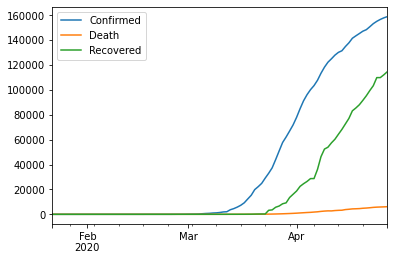

In [26]:
plt.figure();
G.plot();

<Figure size 432x288 with 0 Axes>

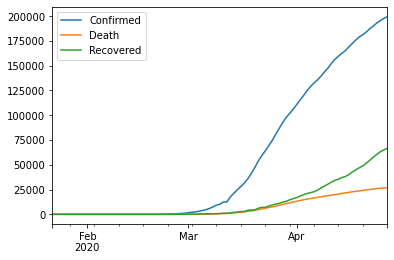

In [27]:
plt.figure();
I.plot();

<Figure size 432x288 with 0 Axes>

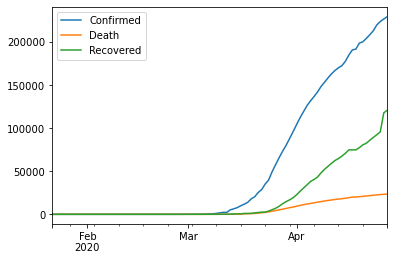

In [28]:
plt.figure();
S.plot();

In [29]:
F2 = F.tail(50)
G2 = G.tail(50)
I2 = I.tail(50)
S2 = S.tail(50)


F2 = F2.set_index(pd.date_range('3/9/2020', periods=50))
G2 = G2.set_index(pd.date_range('3/9/2020', periods=50))
I2 = I2.set_index(pd.date_range('3/9/2020', periods=50))
S2 = S2.set_index(pd.date_range('3/9/2020', periods=50))

<Figure size 432x288 with 0 Axes>

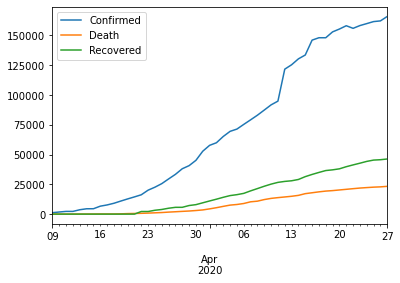

In [34]:
plt.figure();
F2.plot();

<Figure size 432x288 with 0 Axes>

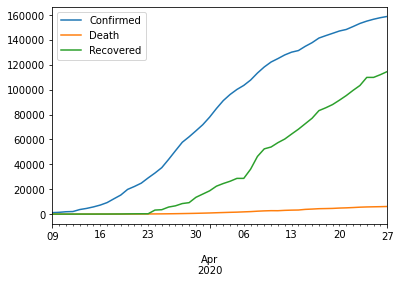

In [31]:
plt.figure();
G2.plot();

<Figure size 432x288 with 0 Axes>

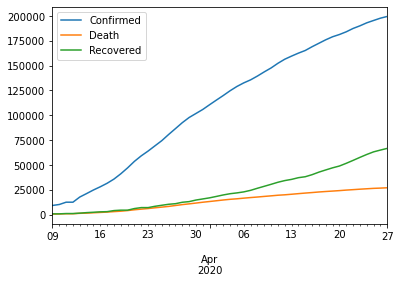

In [32]:
plt.figure();
I2.plot();

<Figure size 432x288 with 0 Axes>

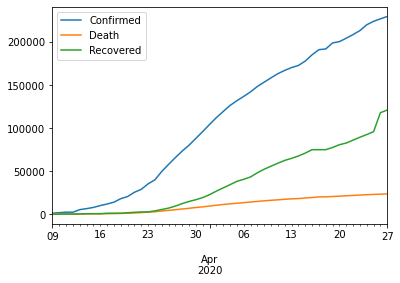

In [33]:
plt.figure();
S2.plot();